# Análise - Students Performance in Exams

Bom dia, boa tarde, boa noite!

Esse notebook tem como objetivo fazer uma breve análise desse dataset público disponibilizado pelo Kaggle (https://www.kaggle.com/spscientist/students-performance-in-exams).

#### Carregando bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
sns.set_style("darkgrid")
sns.set_palette('RdYlGn')

#### Iniciando análise

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Vamos fazer um count nas variáveis, só pra entender a predominancia de gender, race/ethnicity, parental level of education e lunch.

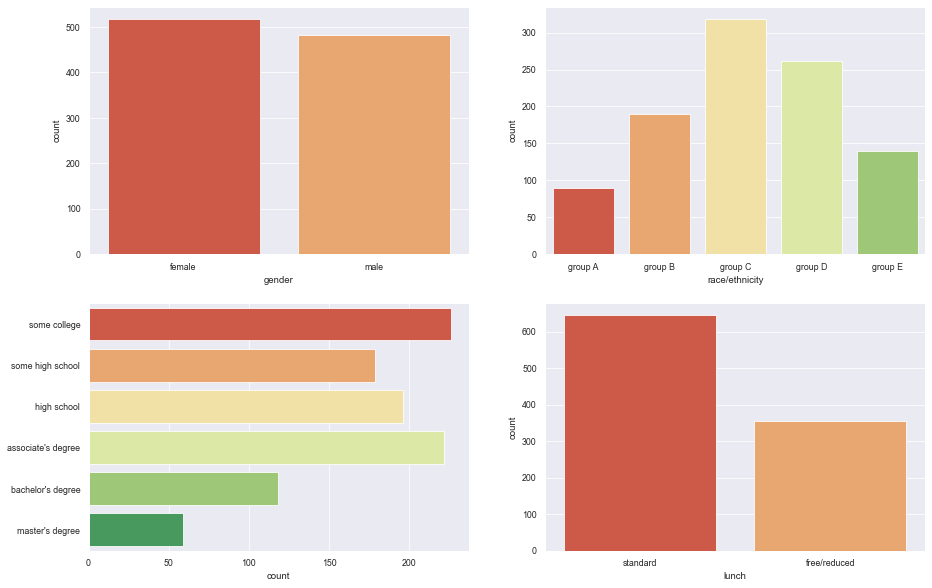

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

fig, _ = plt.subplots(2,2)

sns.countplot(x='gender',
              data=df,
              ax=_[0][0])

sns.countplot(x='race/ethnicity',
              data=df,
              ax=_[0][1],
              order=['group A', 'group B', 'group C', 'group D', 'group E'])

sns.countplot(y='parental level of education',
              data=df,
              ax=_[1][0],
              order=['some college', 'some high school', 'high school', "associate's degree", "bachelor's degree", "master's degree"])

_[1][0].set_ylabel('')

sns.countplot(x='lunch',
              data=df,
              ax=_[1][1])

plt.show()

Ok! Primeiras conclusões:
<ul>
    <li> Existem mais mulheres do que homens na escola. </li>
    <li> A raça/etnia predominante é a C, seguida da D e B. A e E são minoria. </li>
    <li> A maioria dos pais dos estudantes possuem pouco conhecimento acadêmico (some college) e não possuem bacharelado, apenas alguma especialização (associate's degree) </li>
    <li> A maioria utiliza lunch padrão. </li>
</ul>

Vamos analizar agora o desempenho acadêmico por gênero. Qual o desempenho geral para cada disciplina?

In [4]:
gender_math_scores = df.groupby('gender')['math score'].mean()
gender_reading_scores = df.groupby('gender')['reading score'].mean()
gender_writing_scores = df.groupby('gender')['writing score'].mean()

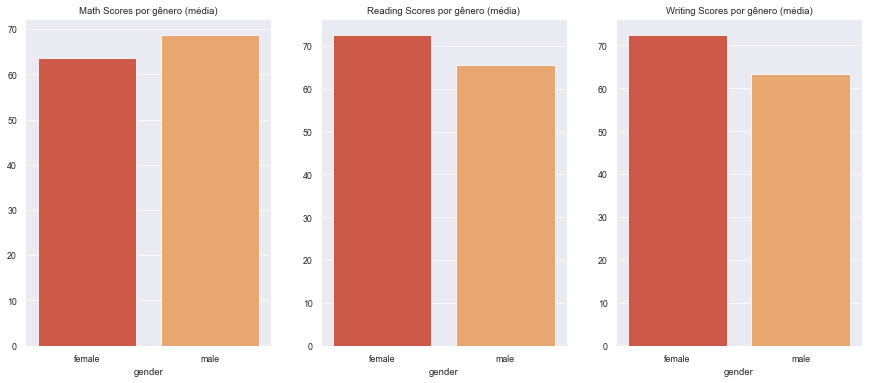

In [5]:
plt.rcParams['figure.figsize'] = [15, 6]

fig, _ = plt.subplots(1,3)

sns.barplot(x=gender_math_scores.index,
            y=gender_math_scores.values,
            ax=_[0])

_[0].title.set_text('Math Scores por gênero (média)')

sns.barplot(x=gender_reading_scores.index,
            y=gender_reading_scores.values,
            ax=_[1])

_[1].title.set_text('Reading Scores por gênero (média)')

sns.barplot(x=gender_writing_scores.index,
            y=gender_writing_scores.values,
            ax=_[2])

_[2].title.set_text('Writing Scores por gênero (média)')

plt.show()

Conclusões:
<ul>
    <li> Os homens possuem uma média de pontuação superior as mulheres na disciplina de matemática </li>
    <li> As mulheres possuem uma média de pontuação superior aos homens na disciplina de leitura e escrita</li>
</ul>

Vamos agora as análises por disciplina.

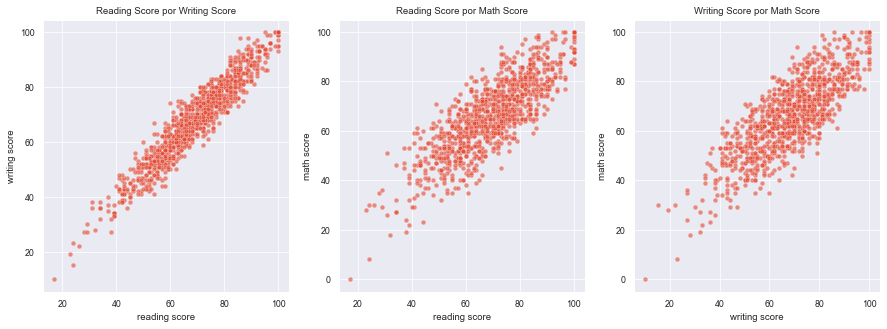

In [6]:
plt.rcParams['figure.figsize'] = [15, 5]

fig, _ = plt.subplots(1,3)

sns.scatterplot(x='reading score',
                y='writing score',
                data=df,
                alpha=0.6,
                ax=_[0])

_[0].title.set_text('Reading Score por Writing Score')

sns.scatterplot(x='reading score',
                y='math score',
                data=df,
                alpha=0.6,
                ax=_[1])

_[1].title.set_text('Reading Score por Math Score')

sns.scatterplot(x='writing score',
                y='math score',
                data=df,
                alpha=0.6,
                ax=_[2])

_[2].title.set_text('Writing Score por Math Score')

plt.show()

Existe uma forte correlação entre a leitura e a escrita. Dessa forma, quem se sai bem na leitura, geralmente se sai bem na escrita também. Essa relação não é tão forte entre leitura e matemática e escrita e matemática. Vamos ver a relação deixando em evidência os gêneros.

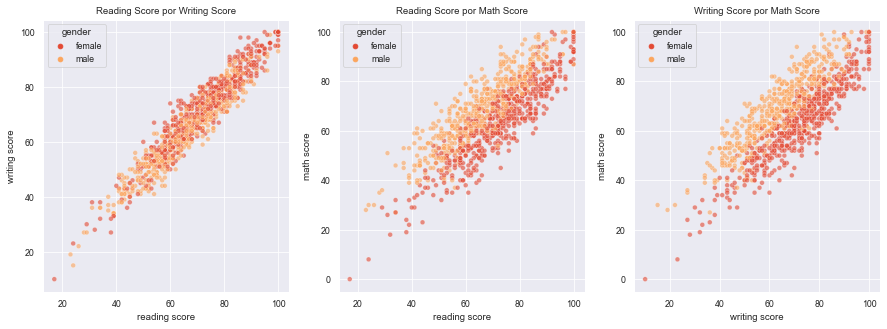

In [7]:
fig, _ = plt.subplots(1,3)

sns.scatterplot(x='reading score',
                y='writing score',
                hue='gender',
                data=df,
                alpha=0.6,
                ax=_[0])

_[0].title.set_text('Reading Score por Writing Score')

sns.scatterplot(x='reading score',
                y='math score',
                hue='gender',
                data=df,
                alpha=0.6,
                ax=_[1])

_[1].title.set_text('Reading Score por Math Score')

sns.scatterplot(x='writing score',
                y='math score',
                hue='gender',
                data=df,
                alpha=0.6,
                ax=_[2])

_[2].title.set_text('Writing Score por Math Score')

plt.show()

O gráfico acima deixa bem evidente as relações. Homens possuem maiores pontuações em matemática, enquanto mulheres em leitura e escrita. Vamos analisar agora se o tempo de estudo anterior a prova influencia nas notas.

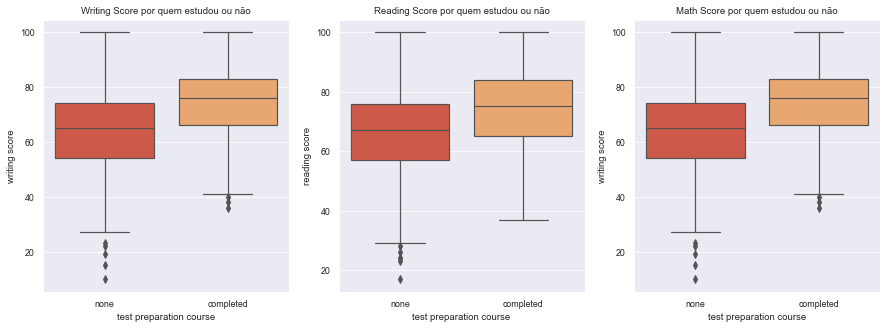

In [8]:
fig, _ = plt.subplots(1,3)

sns.boxplot(x='test preparation course',
            y='writing score',
            data=df,
            ax=_[0])

_[0].title.set_text('Writing Score por quem estudou ou não')

sns.boxplot(x='test preparation course',
            y='reading score',
            data=df,
            ax=_[1])

_[1].title.set_text('Reading Score por quem estudou ou não')

sns.boxplot(x='test preparation course',
            y='writing score',
            data=df,
            ax=_[2])

_[2].title.set_text('Math Score por quem estudou ou não')

plt.show()

É! não tem pra onde fugir. Quem se prepara antes, geralmente tem pontuações maiores. Vamos ver a relação entre as notas dos estudantes e o background acadêmico dos pais. Antes disso, vamos criar uma nova coluna no dataframe, a qual possuirá a média geral do estudante, isso é, todas as notas somadas e dividas pra 3.

In [9]:
df['general mean'] = (df['math score'] + df['writing score'] + df['reading score']) / 3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,general mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Vamos agora para os plots!

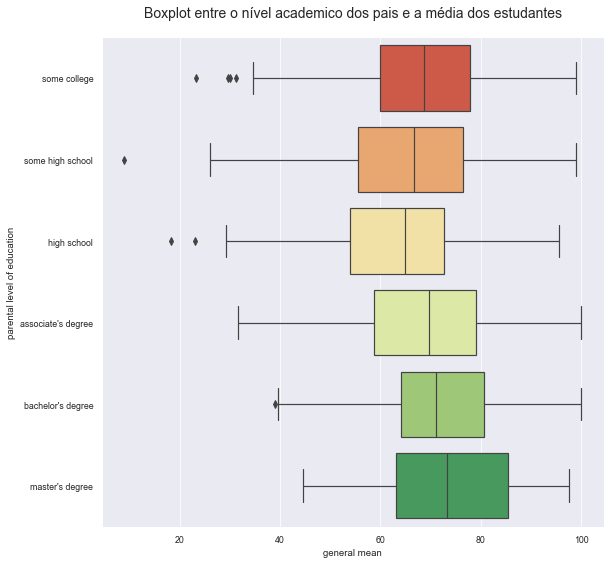

In [10]:
plt.rcParams['figure.figsize'] = [9, 9]

_ = sns.boxplot(y='parental level of education',
                x='general mean',
                data=df,
                order=['some college', 'some high school', 'high school', "associate's degree", "bachelor's degree", "master's degree"])

plt.title('Boxplot entre o nível academico dos pais e a média dos estudantes',
          fontdict={'fontsize':14},
          pad=20)

plt.show()

Conclusões:
<ul>
    <li> Estudantes com pais com mestrado possuem maiores médias nas pontuações que os demais (Será?)</li>
    <li> Estudantes com pais entre some high school e high school são os que possuem as piores médias nas pontuações.</li>

Agora vamos ver se a raça/etnia tem alguma relação com as pontuações dos estudantes.

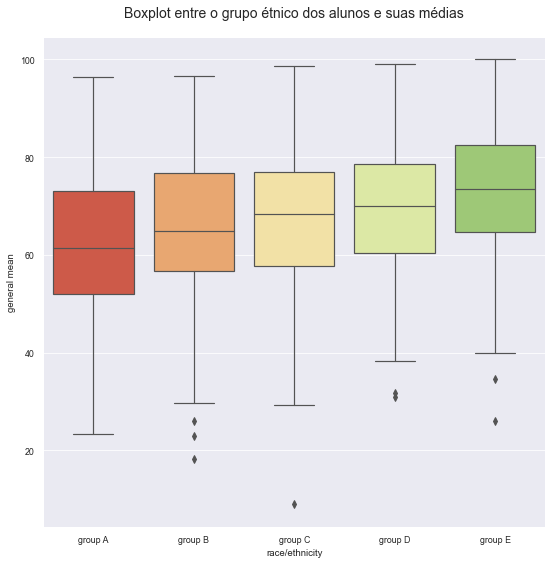

In [11]:
_ = sns.boxplot(x='race/ethnicity',
                y='general mean',
                data=df,
                order=['group A', 'group B', 'group C', 'group D', 'group E'])

plt.title('Boxplot entre o grupo étnico dos alunos e suas médias',
          fontdict={'fontsize':14},
          pad=20)

plt.show()

Aparentemente sim! Possui uma relação linear entre as medianas dos boxplots. Dessa forma, os estudantes do Grupo E possuem maior pontuação que os demais. Os do grupo A são os que possuem menores pontuações.